# Introducción a la optimización

La estimación de parámetros en aprendizaje automático requiere resolver un **problema de optimización** que por lo general se plantea en términos de **minimización** de una **función de pérdida (o coste)** $\;\mathcal{L}:\mathbf{\Theta}\to\mathbb{R}$:
$$\boldsymbol{\theta}^*=\operatorname*{argmin}\limits_{\boldsymbol{\theta}\in\mathbf{\Theta}}\;%
\mathcal{L}(\boldsymbol{\theta})$$
donde el **espacio paramétrico** es usualmente continuo, $\mathbf{\Theta}\subseteq\mathbb{R}^D$, siendo $D$ el número de variables de las que depende la pérdida.

En ocasiones resulta conveniente plantear el problema de optimización como uno de **maximización** de un **función score (de puntuación)** o **función de recompensa** $R(\boldsymbol{\theta})$, lo que equivale a minimizar $\mathcal{L}(\boldsymbol{\theta})=-R(\boldsymbol{\theta})$.

Hablamos de optimización para referirnos de forma genérica a minimización o maximización, asumiendo que el contexto deja claro a cuál de las dos nos referimos. Asimismo, hablamos de **función objetivo** para referirnos a la función a optimizar, y de **solver** para referirnos a un algoritmo que la optimice.

## Optimización local vs global

La **optimización global** de un objetivo consiste en hallar un **óptimo global**, esto es, una solución no mejorable por ninguna otra. Más modestamente, la **optimización local** de un objetivo consiste en hallar un **óptimo local**, es decir, un solución no mejorable por ninguna otra en un entorno local. Formalmente, $\boldsymbol{\theta}^*$ es un **mínimo local (plano)** si
$$\exists\,\delta>0,\quad%
\forall\,\boldsymbol{\theta}\in\Theta\,:\,%
\lVert\boldsymbol{\theta}-\boldsymbol{\theta}^*\rVert<\delta,\quad%
\mathcal{L}(\boldsymbol{\theta}^*)\leq\mathcal{L}(\boldsymbol{\theta})$$
y un **mínimo local estricto** si
$$\exists\,\delta>0,\quad%
\forall\,\boldsymbol{\theta}\in\Theta,\,%
\boldsymbol{\theta}\neq\boldsymbol{\theta}^*\,:\,%
\lVert\boldsymbol{\theta}-\boldsymbol{\theta}^*\rVert<\delta,\quad%
\mathcal{L}(\boldsymbol{\theta}^*)<\mathcal{L}(\boldsymbol{\theta})$$
Supóngase que $\mathcal{L}(\boldsymbol{\theta})$ es doblemente diferenciable, con gradiente $\,\boldsymbol{g}(\boldsymbol{\theta})=\nabla\mathcal{L}(\boldsymbol{\theta})\,$ y Hessiana $\,\boldsymbol{H}(\boldsymbol{\theta})=\nabla^2\mathcal{L}(\boldsymbol{\theta})$. Sean $\,\boldsymbol{\theta}^*\in\mathbb{R}^D$ un punto, $\,\boldsymbol{g}^*=\boldsymbol{g}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}^*}\,$ el gradiente en dicho punto y $\,\boldsymbol{H}^*=\boldsymbol{H}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}^*}\,$ la correspondiente Hessiana. La optimalidad local de $\,\boldsymbol{\theta}^*\,$ puede caracterizarse mediante las siguientes condiciones:
* **Condición necesaria:** $\,$ Si $\boldsymbol{\theta}^*$ es un mínimo local, $\boldsymbol{g}^*=\boldsymbol{0}$ y $\boldsymbol{H}^*$ es semi-definida positiva. La necesidad de que el gradiente sea nulo se justifica fácilmente ya que, si no lo fuera, el objetivo podría minorarse a pequeña distancia en la dirección del negativo del gradiente. Sin embargo, el gradiente nulo es condición insuficiente pues un punto con gradiente nulo, esto es, un **punto estacionario**, puede ser un mínimo local, pero también un máximo local o un punto de silla.
* **Condición suficiente:** $\,$ Si $\boldsymbol{g}^*=\boldsymbol{0}$ y $\boldsymbol{H}^*$ es semi-definida positiva, $\boldsymbol{\theta}^*$ es un mínimo local. La Hessiana semi-definida positiva garantiza que el objetivo no decrece en el entorno del punto; si además es definida positiva, garantiza que el objetivo crece en el entorno del punto, por lo que este es un mínimo local estricto.


**Ejemplo:** $\;\boldsymbol{x}=(x_1, x_2)^t$, $\;\mathcal{L}(\boldsymbol{x})=a_1x_1^2+a_2x_2^2$, $\;a_1,a_2\neq 0$, $\;\boldsymbol{g}(\boldsymbol{x})=(2a_1x_1, 2a_2x_2)$, $\;\boldsymbol{x}^*=\boldsymbol{0}$, $\;\boldsymbol{g}^*=\boldsymbol{g}(\boldsymbol{x})\rvert_{\boldsymbol{x}^*}=\boldsymbol{0}$, $\;\mathbf{H}(\boldsymbol{x})=\operatorname{diag}(2a_1, 2a_2)$, $\;\mathbf{H}^*=\mathbf{H}(\boldsymbol{x})\rvert_{\boldsymbol{x}^*}=\operatorname{diag}(2a_1, 2a_2)$, $\;$, $\;\mathbf{H}^*$ definida positiva sii $a_1, a_2>0$; negativa sii $a_1, a_2<0$; indefinida si son de signo opuesto.


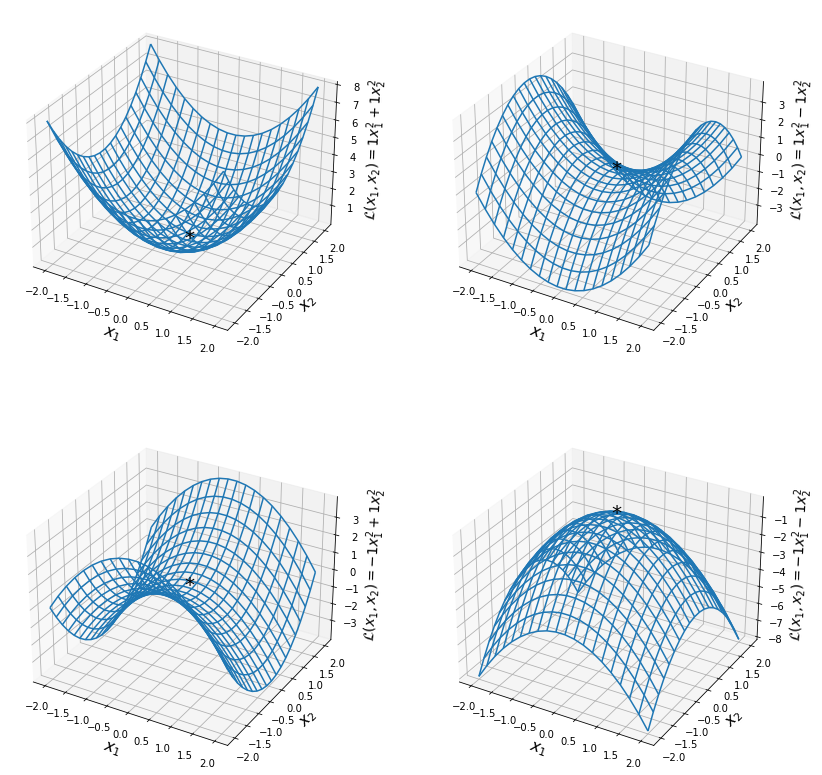

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def L(x1, x2, a=1, b=1):
    return a*x1**2 + b*x2**2

x1, x2 = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
ab = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
nrows, ncols, size = 2, 2, 7
fig = plt.figure(figsize=(size * ncols, size * nrows))
fig.tight_layout()
for i, abi in enumerate(ab):
    ax = fig.add_subplot(nrows, ncols, i+1, projection='3d')
    ax.set_xlabel('$x_1$', fontsize=16)
    ax.set_ylabel('$x_2$', fontsize=16)
    zlabel = '${:}x_1^2{:+}x_2^2$'.format(abi[0], abi[1])
    ax.set_zlabel('$\mathcal{L}(x_1,x_2)=$' + zlabel, fontsize=14)
    ax.text(0, 0, 0, '*', fontsize=20)
    ax.plot_wireframe(x1, x2, L(x1, x2, a=abi[0], b=abi[1]))

## Optimización con o sin restricciones

**Optimización sin restricciones** asume que cualquier valor del espacio paramétrico $\mathbf{\Theta}$ es **solución posible** para minimizar la pérdida. Sin embargo, en **optimización con restricciones**, la minimización se asume sujeta a (que el valor hallado pertenezca a) un cierto **conjunto de soluciones posibles** $\mathcal{C}\subseteq\mathbf{\Theta}$:
$$\boldsymbol{\theta}^*=\operatorname*{argmin}\limits_{\boldsymbol{\theta}\in\mathcal{C}}\;%
\mathcal{L}(\boldsymbol{\theta})$$
$\mathcal{C}$ suele caracterizarse en términos de **restricciones de desigualdad**, $g_j(\boldsymbol{\theta})\leq 0$ para $j\in\mathcal{I}$, y **restricciones de igualdad**, $h_k(\boldsymbol{\theta})=0$ para $k\in\mathcal{E}$:
$$\mathcal{C}=\{\boldsymbol{\theta}:%
g_j(\boldsymbol{\theta})\leq 0: j\in\mathcal{I},\;%
h_k(\boldsymbol{\theta})=0: k\in\mathcal{E}\}\subseteq\mathbb{R}^D$$
La adición de restricciones puede cambiar el número de óptimos y, por lo general, complica la búsqueda de soluciones posibles. Una estrategia usual para resolver problemas con restricciones consiste en **relajar** (eliminar) restricciones y, por cada restricción relajada, añadir un **término de penalización** al objetivo que cuantifique su incumplimiento. Esta estrategia se emplea frecuentemente con restricciones de igualdad, mediante la introducción de **multiplicadores de Lagrange** para construir un objetivo extendido, conocido como la **Lagrangiana**:
$$\boldsymbol{\theta}^*=\operatorname*{argmin}\limits_{\boldsymbol{\theta}\in\mathcal{C}^{\leq 0}}\;%
\min\limits_{\boldsymbol{\lambda}\in\mathbb{R}^{\lvert\mathcal{E}\rvert}}\;%
L(\boldsymbol{\theta}, \boldsymbol{\lambda})\;
\quad\text{con}\quad%
L(\boldsymbol{\theta}, \boldsymbol{\lambda})=\mathcal{L}(\boldsymbol{\theta})%
+\sum_{k\in\mathcal{E}}\lambda_kh_k(\boldsymbol{\theta})$$
Nótese que todo **punto crítico** (estacionario) de la Lagrangiana requiere el cumplimiento de las restricciones:
$$\boldsymbol{\nabla}_{\boldsymbol{\theta}, \boldsymbol{\lambda}}L(\boldsymbol{\theta}, \boldsymbol{\lambda})=\boldsymbol{0}%
\qquad\text{sii}\qquad%
\boldsymbol{\nabla}_{\boldsymbol{\theta}}\mathcal{L}(\boldsymbol{\theta})%
+\sum_{k\in\mathcal{E}}\lambda_k\boldsymbol{\nabla}_{\boldsymbol{\theta}}h_k(\boldsymbol{\theta})=\boldsymbol{0}%
\quad\text{y}\quad%
h_k(\boldsymbol{\theta})=0\;\;\text{para $\,k\in\mathcal{E}$}$$
En el caso de restricciones de desigualdad (p.e. de no negatividad) podemos hacer algo parecido, aunque muchas veces se ignoran sin más y simplemente comprobamos que la solución hallada (sin tenerlas en cuenta) las satisface.

## Optimización convexa vs no-convexa

**Optimización convexa** asume que el objetivo es una función convexa definida sobre un conjunto de soluciones convexo. Formalmente, $\mathcal{S}$ es un **conjunto convexo** si, para todo par de puntos de $\mathcal{S}$, todo punto del segmento lineal que los une también pertenece a $\mathcal{S}$; esto es,
$$\lambda\boldsymbol{x}+(1-\lambda)\boldsymbol{y}\in\mathcal{S}%
\quad\text{para todo}\;\boldsymbol{x}, \boldsymbol{y}\in\mathcal{S},\;\lambda\in[0, 1]$$
Por otro lado, $f$ es una **función convexa** si su epigrafo es conjunto convexo. Equivalentemente, $f$ es convexa si se define sobre un conjunto convexo $\mathcal{S}$ y, para todo par de puntos $\boldsymbol{x}, \boldsymbol{y}\in\mathcal{S}$, todo punto de la cuerda que une $(\boldsymbol{x},f(\boldsymbol{x}))$ con $(\boldsymbol{y},f(\boldsymbol{y}))$ yace sobre $f$; esto es,
$$f(\lambda\boldsymbol{x}+(1-\lambda)\boldsymbol{y})\leq%
\lambda f(\boldsymbol{x})+(1-\lambda)f(\boldsymbol{y})%
\quad\text{para todo}\;\boldsymbol{x}, \boldsymbol{y}\in\mathcal{S},\;\lambda\in[0, 1]$$
Un resultado muy importante es que toda función $f$ doblemente diferenciable en su dominio es convexa sii su Hessiana es semi-definida positiva en todo su dominio; intuitivamente, $f$ es convexa si tiene forma de bol. 

La caracterización de problemas convexos tiene gran interés pues garantizan que todo mínimo local también es global. Así pues, dado un problema de optimización, una de las primeras preguntas que conviene hacerse es si es convexo o no. Asimismo, dado un problema de aprendizaje para el que se quiere diseñar un modelo, también conviene preguntarse si podemos optar o no por un modelo resoluble mediante optimización convexa.

## Optimización suave vs no-suave

**Optimización suave** asume que objetivo y restricciones son funciones continuamente diferenciables, esto es, con derivadas parciales continuas. Dada una función (continuamente diferenciable), su grado de suavidad suele medirse mediante la denominada **constante de Lipschitz**. En 1d, es cualquier constante $L\geq 0$ tal que $\lvert f(x_1)-f(x_2)\rvert\leq L\lvert x_1-x_2\rvert$ para todo $x_1, x_2\in\mathbb{R}$. Obviamente, nuestro interés se centra en hallar la menor $L$ que satisface dicha condición, esto es, la menor pendiente que acota linealmente variaciones de $f$ en valor absoluto. Se sabe que esta constante juega un papel crucial en el comportamiento de modelos (funciones) usuales en aprendizaje automático como las redes neuronales. Por ejemplo, si un modelo varía drásticamente frente a un cambio pequeño de la entrada, es de esperar que se muestre vulnerable frente a ejemplos adversariales y que no generalice bien con datos futuros. En caso opuesto, si el modelo varía extremadamente poco, es de esperar que exhiba un elevado sesgo y, en definitiva, que resulte poco útil.

**Optimización no-suave** admite que existan al menos algunos puntos en los que el gradiente del objetivo o las restricciones no esté bien definido. Con base en esta distinción, en algunos problemas de optimización se plantea un **objetivo compuesto**, $\mathcal{L}=\mathcal{L}_s+\mathcal{L}_r$, tal que $\mathcal{L}_s$ contiene términos suaves, diferenciables, mientras que $\mathcal{L}_r$ recoge términos no suaves. Si este planteamiento es factible, la estructura compuesta del objetivo puede explotarse para facilitar la resolución del problema. Esto resulta muy conveniente en aprendizaje automático, pues muchas veces se plantean objetivos compuestos de una pérdida empírica suave y un regularizador no suave (p.e. la norma $\ell_1$ de $\boldsymbol{\theta}$).